# Electric Vehicle State Incentives

**Data Source: US Department of Energy - Alternative Fuels Data Center (AFDC)** 

URL: https://afdc.energy.gov/laws/state

Data Description: "The National Renewable Energy Laboratory (NREL) maintains a database of state and federal laws and incentives related to alternative fuels and vehicles, air quality, vehicle efficiency, and other transportation-related topics. State-level information is updated annually after each state's legislative session ends; necessary updates may be made independent of the legislative session schedule. Information for these updates is obtained from state legislative websites when the sites are deemed accurate and timely or by calling specific state offices directly. In addition, NREL maintains a resource list of the most useful websites and contacts for every state, as well as a list of search terms states routinely used in website searches."

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import duckdb

## Data Cleaning

In [2]:
# Get the current working directory instead of using __file__
current_dir = os.getcwd()

# Loading state incentives data 
incentives_file_path = os.path.join(current_dir, 'csv_data_files', 'state_laws_and_incentives.csv')
# Read the CSV file into a DataFrame
state_incentives_df = pd.read_csv(incentives_file_path)

# Preview the data 
display(state_incentives_df.head(20))
# display(registration_incentives_df)

,Law Id,State,Title,Text,Enacted Date,Amended Date,Recent?,Sequence Number,Type,Agency,...,Archived Date,Repealed Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories,References,Status,Status Date
0,284,US,Congestion Mitigation and Air Quality (CMAQ) I...,The CMAQ Program provides funding to state dep...,2005-08-10 00:00:00 UTC,2021-11-15 00:00:00 UTC,False,54.0,Incentives,U.S. Department of Transportation,...,NaN,NaN,NaN,BIOD|ETH|ELEC|HY|IR|NG|PHEV|LPG,GNT,NaN,STATION|FLEET|GOV|TRANS,https://www.congress.gov/public-laws/117th-con...,amended,2021-11-15
1,288,US,Clean Cities and Communities,The mission of Clean Cities and Communities is...,NaN,NaN,False,21.0,Programs,U.S. Department of Energy,...,NaN,NaN,NaN,AFTMKTCONV|BIOD|ETH|ELEC|EFFEC|HEV|HY|IR|NG|NE...,GNT|OTHER,NaN,STATION|AFP|PURCH|MAN|FLEET|GOV|IND,NaN,NaN,NaN
2,317,US,State Energy Program (SEP) Funding,The SEP provides grants to states to assist in...,NaN,2021-11-15 00:00:00 UTC,False,26.0,Incentives,U.S. Department of Energy,...,NaN,NaN,NaN,BIOD|ETH|ELEC|EFFEC|HY|NG|PHEV|LPG,GNT,NaN,GOV,https://www.congress.gov/public-laws/117th-con...,amended,2021-11-15
3,323,US,Clean School Bus,The U.S. Environmental Protection Agency's (EP...,NaN,2021-11-15 00:00:00 UTC,False,33.0,Incentives,U.S. Environmental Protection Agency,...,NaN,NaN,NaN,AFTMKTCONV|ETH|ELEC|EFFEC|HY|IR|NG|PHEV|LPG,GNT,NaN,FLEET|GOV|TRIBAL,https://www.congress.gov/public-laws/117th-con...,amended,2021-11-15
4,324,US,Clean Construction and Agriculture,Clean Construction is a voluntary program that...,NaN,NaN,False,34.0,Programs,U.S. Environmental Protection Agency,...,NaN,NaN,NaN,BIOD|ELEC|HEV|HY|NG|PHEV|LPG,GNT,NaN,PURCH|FLEET|OTHER,NaN,NaN,NaN
5,325,US,Ports Initiative,The U.S. Environmental Protection Agency\'s (E...,NaN,NaN,False,34.0,Programs,U.S. Environmental Protection Agency,...,NaN,NaN,NaN,BIOD|ELEC|HEV|HY|NG|PHEV|LPG,GNT|OTHER,NaN,FLEET|GOV,NaN,NaN,NaN
6,383,US,Voluntary Airport Low Emission (VALE) Program,The goal of the VALE Program is to reduce grou...,2005-08-10 00:00:00 UTC,NaN,False,56.0,Programs,U.S. Department of Transportation,...,NaN,NaN,NaN,BIOD|ETH|ELEC|HEV|HY|NG|PHEV|LPG,GNT,NaN,STATION|FLEET,NaN,enacted,2005-08-10
7,392,US,Electric Vehicle (EV) and Fuel Cell Electric V...,The U.S. Department of Energy (DOE) provides g...,2005-08-08 00:00:00 UTC,2022-08-16 00:00:00 UTC,False,27.0,Incentives,U.S. Department of Energy,...,NaN,NaN,NaN,ELEC|HEV|HY|PHEV,LOANS,NaN,MAN,NaN,amended,2022-08-16
8,409,US,Electric Vehicle (EV) and Fuel Cell Electric V...,The Inflation Reduction Act of 2022 (Public La...,2008-10-03 00:00:00 UTC,2022-08-16 00:00:00 UTC,False,18.0,Incentives,U.S. Internal Revenue Service,...,NaN,NaN,NaN,ELEC|HY|PHEV,TAX,NaN,FLEET|IND,https://www.congress.gov/112/plaws/publ240/PLA...,amended,2022-08-16
9,411,US,Advanced Technology Vehicle (ATV) and Alternat...,The U.S. Department of Energy's (DOE) Advanced...,2007-12-17 00:00:00 UTC,2021-08-16 00:00:00 UTC,False,NaN,Incentives,U.S. Department of Energy,...,NaN,NaN,NaN,ELEC|EFFEC|HEV|PHEV,LOANS,NaN,MAN,https://www.congress.gov/public-laws/117th-con...,amended,2021-08-16


In [3]:
# Analyze columns within the state incentive dataset
state_incentives_df.columns

Index(['Law Id', 'State', 'Title', 'Text', 'Enacted Date', 'Amended Date',
       'Recent?', 'Sequence Number', 'Type', 'Agency',
       'Significant Update Date', 'Expired Date', 'Archived Date',
       'Repealed Date', 'Topic', 'Technology Categories',
       'Incentive Categories', 'Regulation Categories', 'User Categories',
       'References', 'Status', 'Status Date'],
      dtype='object')

In [4]:
# Check dates in "Repealed Date" 
repealed_not_na = state_incentives_df[state_incentives_df['Repealed Date'].notna()]
repealed_not_na[['Enacted Date','Type','Repealed Date']].reset_index()

,index,Enacted Date,Type,Repealed Date
0,506,NaN,State Incentives,2029-09-01 00:00:00 UTC


In [5]:
# Check dates in "Archived Date"
archived_not_na = state_incentives_df[state_incentives_df['Archived Date'].notna()]
archived_not_na[['Enacted Date','Type','Archived Date']].reset_index()

,index,Enacted Date,Type,Archived Date
0,438,2021-10-07 00:00:00 UTC,State Incentives,2024-10-10 00:00:00 UTC
1,540,2022-08-16 00:00:00 UTC,Incentives,2031-09-30 00:00:00 UTC
2,676,2005-08-08 00:00:00 UTC,Incentives,2022-12-31 00:00:00 UTC


In [6]:
# Drop unecessary columns 
incentives_cols_to_drop = ['Law Id', 'Text', 'Recent?', 'Sequence Number', 
                           'Agency', 'Topic','Technology Categories', 'Archived Date',
                           'Amended Date', 'Repealed Date', 'User Categories',
                           'References', 'Status Date','Regulation Categories',
                           'Significant Update Date']
state_incentives_df = state_incentives_df.drop(columns=incentives_cols_to_drop)
state_incentives_df

,State,Title,Enacted Date,Type,Expired Date,Incentive Categories,Status
0,US,Congestion Mitigation and Air Quality (CMAQ) I...,2005-08-10 00:00:00 UTC,Incentives,NaN,GNT,amended
1,US,Clean Cities and Communities,NaN,Programs,NaN,GNT|OTHER,NaN
2,US,State Energy Program (SEP) Funding,NaN,Incentives,NaN,GNT,amended
3,US,Clean School Bus,NaN,Incentives,NaN,GNT,amended
4,US,Clean Construction and Agriculture,NaN,Programs,NaN,GNT,NaN
...,...,...,...,...,...,...,...
694,CA,Residential Electric Vehicle (EV) Charger Reba...,NaN,State Incentives,NaN,RBATE,NaN
695,CA,Medium- and Heavy-Duty (MHD) Zero Emission Veh...,2023-10-07 00:00:00 UTC,State Incentives,NaN,LOANS,enacted
696,CA,Zero Emission Vehicle (ZEV) and Infrastructure...,NaN,State Incentives,NaN,GNT,NaN
697,CA,School Zero Emission Vehicle (ZEV) and Infrast...,NaN,State Incentives,NaN,GNT,NaN


In [7]:
# Drop rows that contain national-level data 
state_incentives_df = state_incentives_df[state_incentives_df['State'] != 'US']

# Filter Type to only display state incentives 
state_incentives_df = state_incentives_df[
state_incentives_df['Type'] == 'State Incentives']

# Sort data in alphabetical order by state and enacted date
state_incentives_df = state_incentives_df.sort_values(by=['State', 'Enacted Date'],
                                                      ascending=[True,True])
state_incentives_df.reset_index(drop=True, inplace=True)

state_incentives_df.head(20)

,State,Title,Enacted Date,Type,Expired Date,Incentive Categories,Status
0,AK,Alaska's National Electric Vehicle Infrastruct...,NaN,State Incentives,NaN,GNT,NaN
1,AL,Electric Vehicle (EV) Charger and Medium- and ...,NaN,State Incentives,NaN,RBATE,NaN
2,AL,Electric Vehicle (EV) Chargers Grants,NaN,State Incentives,NaN,GNT,NaN
3,AL,Alabama's National Electric Vehicle Infrastruc...,NaN,State Incentives,NaN,GNT,NaN
4,AR,Arkansas' National Electric Vehicle Infrastruc...,NaN,State Incentives,NaN,GNT,NaN
5,AR,Diesel Emissions Reduction Grants,NaN,State Incentives,NaN,GNT,NaN
6,AR,Clean Fuels Program,NaN,State Incentives,NaN,GNT,NaN
7,AR,Bus Replacement Grants,NaN,State Incentives,NaN,GNT,NaN
8,AZ,Alternative Fuel Vehicle (AFV) Parking Incentive,2013-01-01 00:00:00 UTC,State Incentives,NaN,EXEM,enacted
9,AZ,Zero Emission Vehicle Emissions Test Exemption,2016-01-01 00:00:00 UTC,State Incentives,NaN,EXEM,enacted


In [8]:
# Convert each date column to the same datetime format
date_columns = ['Enacted Date', 'Expired Date']

for column in date_columns:
    state_incentives_df[column] = pd.to_datetime(state_incentives_df[column],
                                                 errors='coerce')
    # Extract the year directly
    state_incentives_df[column] = state_incentives_df[column].dt.year

# Check the resulting DataFrame
state_incentives_df.head(20)
state_incentives_df.shape


(306, 7)

In [9]:
# Drop rows with inactive state incentives
start_date = 2016
end_date = 2023
active_state_incentives_df = state_incentives_df[
    (state_incentives_df['Enacted Date'] <= end_date) & 
    ((state_incentives_df['Expired Date'] >= start_date) | 
      (state_incentives_df['Expired Date'].isna()))]

active_state_incentives_df.reset_index(drop=True, inplace=True)

# Dictionary to map state abbreviations to full names
state_abbreviation_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California','CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia','HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska',
    'NV': 'Nevada', 'NH': 'New Hampshire','NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia',
    'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

active_state_incentives_df.loc[:, 'State'] = active_state_incentives_df['State'].map(state_abbreviation_to_name)
active_state_incentives_df

,State,Title,Enacted Date,Type,Expired Date,Incentive Categories,Status
0,Arizona,Alternative Fuel Vehicle (AFV) Parking Incentive,2013.0,State Incentives,NaN,EXEM,enacted
1,Arizona,Zero Emission Vehicle Emissions Test Exemption,2016.0,State Incentives,NaN,EXEM,enacted
2,Arizona,Reduced Alternative Fuel Vehicle (AFV) License...,2018.0,State Incentives,NaN,TAX,amended
3,California,High Occupancy Vehicle (HOV) and High Occupanc...,2006.0,State Incentives,NaN,EXEM,amended
4,California,Alternative Fuel and Vehicle Incentives,2007.0,State Incentives,NaN,GNT|LOANS,amended
...,...,...,...,...,...,...,...
107,Washington,Alternative Fueling Infrastructure Grant Program,2015.0,State Incentives,NaN,GNT,amended
108,Washington,Green Transportation Grant Program,2019.0,State Incentives,NaN,GNT,enacted
109,Washington,Alternative Fuel Vehicle (AFV) Retail Sales an...,2019.0,State Incentives,2028.0,EXEM,enacted
110,Washington,Zero Emission Vehicle (ZEV) Carshare Grant,2022.0,State Incentives,NaN,GNT,enacted


## Plots

In [10]:
# Loading ev registration data 
# Read the CSV file into a DataFrame
regis_file_path = os.path.join(current_dir, 'csv_data_files', 'ev_registration_data.csv')
registration_df = pd.read_csv(regis_file_path)

def clean_regis(regis):
    if pd.isna(regis):
        return None
    regis = regis.replace(',', '').strip()
    return float(regis)
    
registration_df['Electric'] = registration_df['Electric'].apply(clean_regis)

             State  Active Incentives Count
0          Arizona                        3
1       California                       12
2         Colorado                        5
3      Connecticut                        2
4         Delaware                        3
5          Florida                        2
6          Georgia                        4
7           Hawaii                        2
8         Illinois                        7
9          Indiana                        1
10        Kentucky                        1
11       Louisiana                        1
12           Maine                        2
13        Maryland                        5
14   Massachusetts                        2
15        Michigan                        2
16       Minnesota                        2
17        Missouri                        1
18          Nevada                        1
19      New Jersey                        1
20      New Mexico                        3
21        New York              

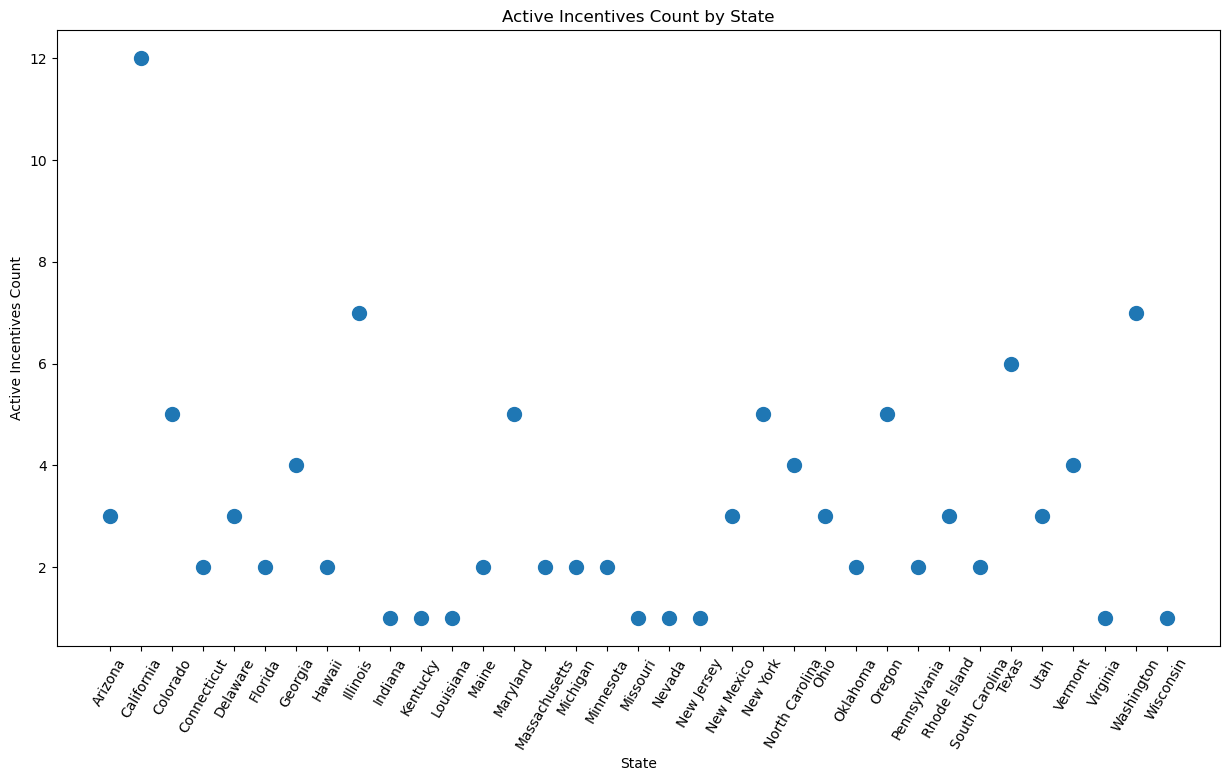

In [11]:
# Count number of active incentives per state 
active_incentives_count = active_state_incentives_df.groupby('State') \
.size().reset_index(name='Active Incentives Count')

print(active_incentives_count)

# Create dataframe with the provided data 
incentives_states_df  = {
    'State': ['Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
              'Georgia', 'Hawaii', 'Illinois', 'Indiana', 'Kentucky', 'Louisiana',
              'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Missouri',
              'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
              'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'Wisconsin'],
    'Active Incentives Count': [3, 12, 5, 2, 3, 2, 4, 2, 7, 1, 1, 1, 2, 5,
                                2, 2, 2, 1, 1, 1, 3, 5, 4, 3, 2, 5, 2,
                                3, 2, 6, 3, 4, 1, 7, 1]
}

adoption_incentives_df = pd.DataFrame(incentives_states_df )

# Create the scatter plot
plt.figure(figsize=(15, 8))
plt.plot(adoption_incentives_df['State'], adoption_incentives_df['Active Incentives Count'], 'o', markersize=10)

# Add titles and labels
plt.title('Active Incentives Count by State')
plt.xlabel('State')
plt.ylabel('Active Incentives Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()

# # Sum EV adoptions per state and year from the registration_df
ev_adoptions_per_state = registration_df.groupby(['State', 'Year'])['Electric'] \
.sum().reset_index(name='EV Adoptions')

# Merge incentive counts with EV adoption data
adoptions_incentives_df = ev_adoptions_per_state.merge(active_incentives_count,
                                                       on='State', how='left')
# Filter to include only states with active incentives
adoptions_incentives_df = adoptions_incentives_df[
adoptions_incentives_df['Active Incentives Count'] > 0]

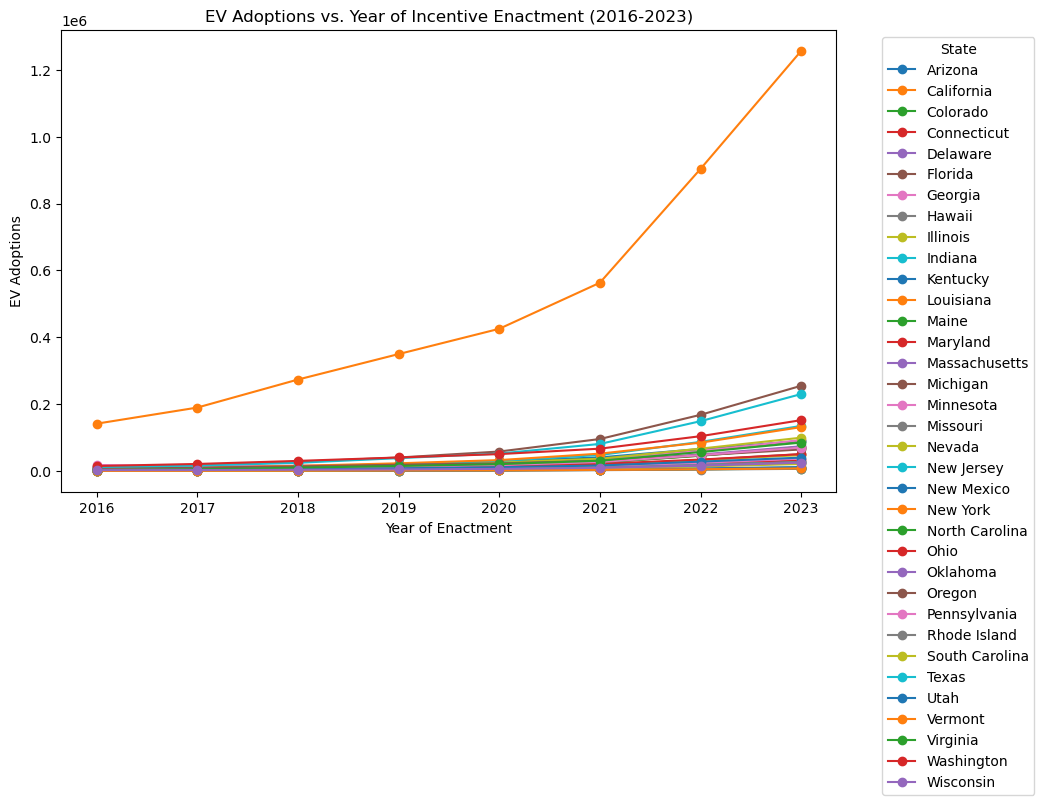

In [12]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Loop through each state to plot their line separately
for state in adoptions_incentives_df['State'].unique():
    state_data = adoptions_incentives_df[adoptions_incentives_df['State'] == state]
    plt.plot(state_data['Year'], state_data['EV Adoptions'], marker='o', label=state)

# Add title and labels
plt.title('EV Adoptions vs. Year of Incentive Enactment (2016-2023)')
plt.xlabel('Year of Enactment')
plt.ylabel('EV Adoptions')

# Show legend
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


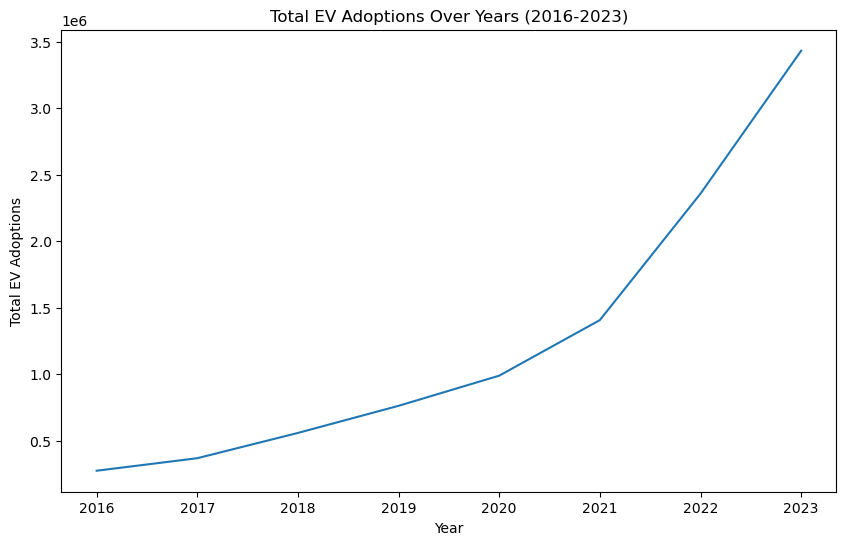

In [13]:
# Sum EV adoptions per year for states with active incentives
yearly_ev_adoptions = registration_df[registration_df['State'].
isin(adoptions_incentives_df['State'])].groupby(['Year'])['Electric'].sum().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_ev_adoptions, x='Year', y='Electric')
plt.title('Total EV Adoptions Over Years (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Total EV Adoptions')
plt.show()
